Homework 8
====
#### CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.0 (3/15/2016)

----

Short Exercises (48 Points)
====

Answer each using Python. Write out any constraints or rearrangements of equations in Markdown. You must make a graph showing the demonstrating your solution for each problem (4 Points per problem). You must also print your numerical answer.


#### 1.0 See example

Find the maximum x-value for this equation:

$$ \sin(x) - x^2$$

on the domain $[0, \pi]$



#### 1.1

Find the intersection between these two curves:

$$ \frac{(x - 4)^2}{4} $$

$$ \frac{(x + 2)^2}{3} $$

#### 1.2
Consider $-p\ln p$, where $p$ is a probability. What $p$ gives the maximum?


#### 1.3
Solve for $x$:

$$ \cos(x) = x $$

#### 1.4
Repeat 1.3 by creating an objective function and minimizing it.

*Hint: Try rearranging the equation into an expression that is $0$ when the equation is satisifed and POSITIVE everywhere else. *

#### 1.5
Using a similar idea of an objective function, what $x$ most satisfies the following equations:

$$ 4 x  +  4 = 12 $$
$$ 3x - 2 = 3$$

*Hint: you can only minimize one thing, so try adding together multiple objective functions.*

#### 1.6
Consider these two curves:

$$f(x) = \cos(14.5 x - 0.3) + ( x + 0.2) x $$

$$g(x) = x^3 - x^2 + x$$

Find the $x^*$ that both minimizes $f(x^*)$ and has the property that $f(x^*) > g(x^*)$


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

Answer 1.0
---

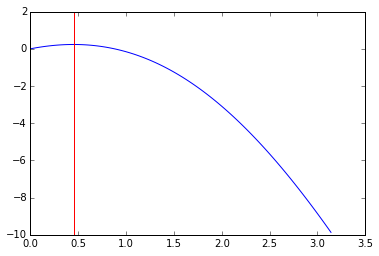

Optimum x: [ 0.45018348]


In [3]:
#set-up function which we're optimizing
def fxn_10(x):
    return np.sin(x) - x**2

#perform optimization and store result
#invert the sign on the equation to to maximization
result = opt.minimize(lambda can_write_anything_here: -fxn_10(can_write_anything_here), x0= np.pi / 2, bounds=[(0, np.pi)])

#make some points to use for plotting
x_grid = np.linspace(0, np.pi, 100)

#plot the function
plt.plot(x_grid, fxn_10(x_grid))

#create a vertical line at the optimum x value
plt.axvline(result.x, color='red')

plt.show()

print('Optimum x: {}'.format(result.x))

Answer 1.1
---

Intersection occurs when:

$$ \frac{(x - 4)^2}{4} - \frac{(x + 2)^2}{3} = 0 $$


0.784609690827


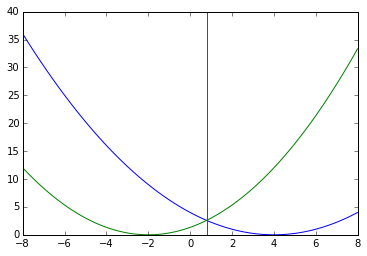

In [85]:
def fxn_11(x):
    return (x - 4)**2 / 4 - (x + 2)**2 / 3
x = opt.newton(fxn_11, x0=0)
print(x)

grid = np.linspace(-8, 8, 100)
plt.plot(grid, (grid - 4)**2 / 4)
plt.plot(grid, (grid + 2)**2 / 3)
plt.axvline(x, color='red')

plt.show()

Answer 1.2
---

This simply requires maximization like the example problem

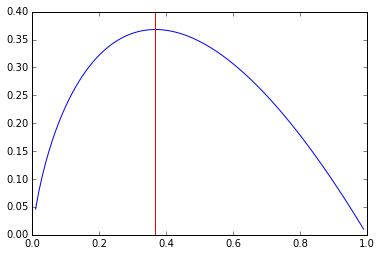

[ 0.36787945]


In [89]:
#set-up function which we're optimizing
def fxn_12(p):
    return -p * np.log(p)

#perform optimization and store result
#invert the sign on the equation to to maximization
result = opt.minimize(lambda u: -fxn_12(u), x0= 0.5, bounds=[(0, 1)])

#make some points to use for plotting
p_grid = np.linspace(0.01, 0.99, 100)

#plot the function
plt.plot(p_grid, fxn_12(p_grid))

#create a vertical line at the optimum x value
plt.axvline(result.x, color='red')

plt.show()

print(result.x)

Answer 1.3
----

This is similar to the intersection problem:

$$ \cos(x) - x  = 0$$

0.739085133215


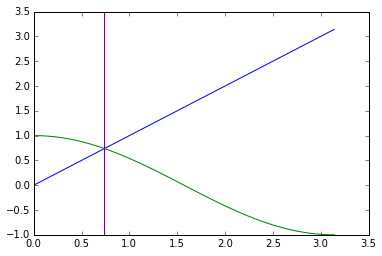

In [43]:
x_opt = opt.newton(lambda g: np.cos(g) - g, x0=0)

print(x_opt)

x_grid = np.linspace(0,np.pi, 100)

plt.plot(x_grid, x_grid)
plt.plot(x_grid, np.cos(x_grid))
plt.axvline(x_opt, color='purple')

plt.show()

Answer 1.4
---

I'll define my objective function to be

$$ \left[\cos(x) - x\right]^2 $$

[ 0.73908512]


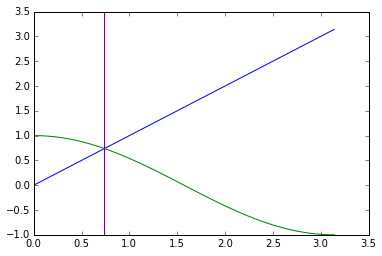

In [46]:
x_opt = opt.minimize(lambda g: (np.cos(g) - g)**2, x0=0)
x_opt = x_opt.x # remember the minimize function returns a bunch of extra crap

print(x_opt)

x_grid = np.linspace(0,np.pi, 100)

plt.plot(x_grid, x_grid)
plt.plot(x_grid, np.cos(x_grid))
plt.axvline(x_opt, color='purple')

plt.show()

Answer 1.5
---

We'll just sum together the two objective functions

$$ \left[ 4x - 8\right]^2 $$
$$ \left[3x - 5 \right]^2 $$

There are many plots to show this. Be lenient in grading.

[ 1.88]


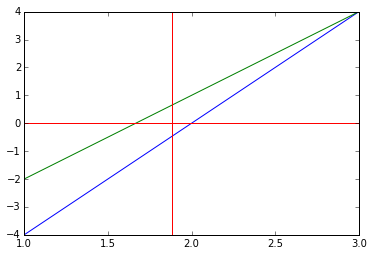

In [57]:
def fxn_15(x):
    return (4 * x - 8 )**2 + (3 * x - 5)**2

x_opt  = opt.minimize(fxn_15, x0=0)
x_opt = x_opt.x
print(x_opt)


#not a great 
x_grid = np.linspace(1,3, 100)

plt.plot(x_grid, 4 *x_grid - 8)
plt.plot(x_grid, 3 * x_grid- 5)
plt.axhline(0, color='red')
plt.axvline(x_opt,color='red')

plt.show()

Answer 1.6
---

The main challenge here is coming up with the constraint. Your constraint equation is that $f(x) - g(x) > 0$. Also, this is non-convex so basing hopping should be used. 

                  nfev: 55088
 minimization_failures: 76
                   fun: array([-0.73248775])
                     x: array([-0.62430324])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 13779
                   nit: 1000


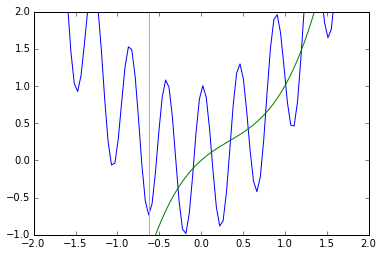

[-0.62430324]


In [91]:
def non_convex(x):
    return np.cos(14.5 * x - 0.3) + (x + 0.2) * x
def poly(x):
    return x ** 3 - x**2 + x

my_constraints = {'type': 'ineq', 'fun': lambda y: non_convex(y) - poly(y)}
kwargs = {'constraints': my_constraints}
result = opt.basinhopping(non_convex, x0=0, minimizer_kwargs=kwargs, niter=1000)
print(result)
x_opt = result.x

x_grid = np.linspace(-2, 2, 100)
plt.plot(x_grid, non_convex(x_grid))
plt.plot(x_grid, poly(x_grid))
plt.axvline(x_opt, color='orange')
plt.ylim(-1, 2)

plt.show()

print(x_opt)